<a href="https://colab.research.google.com/github/palpitation0/Machine-Learning-homework/blob/master/14%EA%B0%95_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
import pandas as pd
import numpy as np

Using TensorFlow backend.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving dividend.csv to dividend.csv


In [0]:
data = pd.read_csv('dividend.csv')

In [5]:
data.head()

,dividend,fcfps,earnings_growth,de,mcap,current_ratio
0,0,2.75,-19.25,1.11,545,0.924056
1,1,4.96,0.83,1.09,630,1.468572
2,1,2.78,1.09,0.19,562,1.975875
3,0,0.43,12.97,1.70,388,1.941998
4,1,2.94,2.44,1.83,684,2.487467


In [0]:
X = data.iloc[:, 1:6].values
y = data.iloc[:, 0].values

In [7]:
print(X.shape)
print(y.shape)

(200, 5)
(200,)


In [18]:
from sklearn.preprocessing import minmax_scale
X_scaled = minmax_scale(X, axis=0, copy=True)
X = pd.DataFrame(X_scaled, columns=data.columns[1:6])
X.head(5)

,fcfps,earnings_growth,de,mcap,current_ratio
0,0.543611,0.000000,0.267176,0.635057,0.317704
1,0.991886,0.338332,0.262087,0.757184,0.505208
2,0.549696,0.342713,0.033079,0.659483,0.679897
3,0.073022,0.542881,0.417303,0.409483,0.668232
4,0.582150,0.365459,0.450382,0.834770,0.856064


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =
 train_test_split(X, y, test_size=0.25, random_state=0)

In [22]:
print(y_train.shape[0])

150


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train, num_classes=2)
y_test = np_utils.to_categorical(y_test, num_classes=2)

In [0]:
model=Sequential()
model.add(Dense(30, input_dim=5, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                180       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_3 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 22        
Total params: 512
Trainable params: 512
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=20, epochs=10, verbose=1)

Train on 150 samples, validate on 50 samples
Epoch 1/10
150/150 [==============================] - 0s 2ms/step - loss: 0.7361 - acc: 0.4600 - val_loss: 0.5997 - val_acc: 0.6200
Epoch 2/10
150/150 [==============================] - 0s 111us/step - loss: 0.6930 - acc: 0.4733 - val_loss: 0.5895 - val_acc: 0.6200
Epoch 3/10
150/150 [==============================] - 0s 111us/step - loss: 0.6567 - acc: 0.4933 - val_loss: 0.5803 - val_acc: 0.6200
Epoch 4/10
150/150 [==============================] - 0s 108us/step - loss: 0.6393 - acc: 0.5133 - val_loss: 0.5717 - val_acc: 0.6200
Epoch 5/10
150/150 [==============================] - 0s 113us/step - loss: 0.6074 - acc: 0.5667 - val_loss: 0.5635 - val_acc: 0.7400
Epoch 6/10
150/150 [==============================] - 0s 111us/step - loss: 0.6052 - acc: 0.7267 - val_loss: 0.5520 - val_acc: 0.8400
Epoch 7/10
150/150 [==============================] - 0s 147us/step - loss: 0.5834 - acc: 0.8133 - val_loss: 0.5364 - val_acc: 0.8400
Epoch 8/10
150/150 

In [0]:
prediction = model.predict(X_test)
length = len(prediction)
y_label = np.argmax(y_test, axis=1)
predict_label = np.argmax(prediction, axis=1)

In [42]:
print(y_label)
print(predict_label)

[1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 1 0 0 1 0 1 1]
[1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 0 1 1 0 1 1]


In [43]:
accuracy = np.sum(y_label == predict_label)/length
print(accuracy)

0.88


In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_label, predict_label)

array([[14,  5],
       [ 1, 30]])

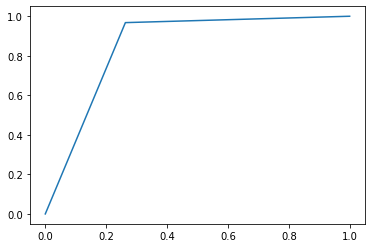

In [69]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
fpr, tpr, threshold = metrics.roc_curve(y_label, predict_label)
plt.plot(fpr, tpr)
plt.show()

In [0]:
model2=Sequential()
model2.add(Dense(8, input_dim=5, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(2, activation='softmax'))
model2.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [63]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 48        
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 18        
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [64]:
model2.fit(X_train, y_train, validation_data=(X_test, y_test),
          batch_size=20, epochs=10, verbose=1)

Train on 150 samples, validate on 50 samples
Epoch 1/10
150/150 [==============================] - 0s 2ms/step - loss: 0.7084 - acc: 0.5600 - val_loss: 0.7888 - val_acc: 0.4000
Epoch 2/10
150/150 [==============================] - 0s 108us/step - loss: 0.7060 - acc: 0.5733 - val_loss: 0.7679 - val_acc: 0.3800
Epoch 3/10
150/150 [==============================] - 0s 121us/step - loss: 0.6793 - acc: 0.6267 - val_loss: 0.7493 - val_acc: 0.4000
Epoch 4/10
150/150 [==============================] - 0s 106us/step - loss: 0.6704 - acc: 0.5933 - val_loss: 0.7309 - val_acc: 0.4200
Epoch 5/10
150/150 [==============================] - 0s 110us/step - loss: 0.6710 - acc: 0.6333 - val_loss: 0.7157 - val_acc: 0.5000
Epoch 6/10
150/150 [==============================] - 0s 107us/step - loss: 0.6593 - acc: 0.6333 - val_loss: 0.7007 - val_acc: 0.5800
Epoch 7/10
150/150 [==============================] - 0s 113us/step - loss: 0.6558 - acc: 0.6267 - val_loss: 0.6869 - val_acc: 0.5800
Epoch 8/10
150/150 

In [0]:
prediction2 = model2.predict(X_test)
length = len(prediction)
y_label = np.argmax(y_test, axis=1)
predict2_label = np.argmax(prediction2, axis=1)

In [66]:
print(y_label)
print(predict2_label)

[1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 1 1 0 0 1 0 1 1]
[1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0
 1 0 0 0 0 1 1 1 1 0 0 0 0]


In [67]:
accuracy2 = np.sum(y_label == predict2_label)/length
print(accuracy2)

0.58


In [68]:
confusion_matrix(y_label, predict2_label)

array([[12,  7],
       [14, 17]])

In [0]:
# model2 가 model 에 비해 정확도 낮음